In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv("Titanic/train.csv")
X_test = pd.read_csv("Titanic/test.csv")
combine = [X_train,X_test]

# **Variable Description**


*   PassengerId: unique id number to each passenger
*   Survived: passenger survived(1) or died(0)

*   Pclass: passenger class
*   Name: name

* Sex: gender of passenger
* Age: age of passenger
* SibSp: number of siblings/spouses
* Parch: number of parents/children
* Ticket: ticket number
* Fare: amount of money spend on ticket
* Cabin: cabin category
* Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
X_train.shape

(891, 12)

In [4]:
X_test.shape

(418, 11)

In [5]:
X_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
X_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
print(X_train.columns)
print("---------------")
print(X_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
---------------
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [11]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [12]:
X_train.head(n = 6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [13]:
X_test.head(n = 6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [14]:
X_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [15]:
X_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [16]:
X_train[['Pclass', 'Survived']].groupby(['Pclass']).mean() * 100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [17]:
X_train[["Sex","Survived"]].groupby(["Sex"]).mean() * 100

,Survived
Sex,
female,74.203822
male,18.890815


In [18]:
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(X_train['Fare'].median())
X_train['CategoricalFare'] = pd.qcut(X_train['Fare'], 4)
X_train[["CategoricalFare","Survived"]].groupby(["CategoricalFare"]).mean() * 100

,Survived
CategoricalFare,
"(-0.001, 7.91]",19.730942
"(7.91, 14.454]",30.357143
"(14.454, 31.0]",45.495495
"(31.0, 512.329]",58.108108


In [19]:
X_train[["SibSp","Survived"]].groupby(["SibSp"]).mean() * 100

,Survived
SibSp,
0,34.539474
1,53.588517
2,46.428571
3,25.000000
4,16.666667
5,0.000000
8,0.000000


In [20]:
X_train[["Parch","Survived"]].groupby(["Parch"]).mean() * 100

,Survived
Parch,
0,34.365782
1,55.084746
2,50.000000
3,60.000000
4,0.000000
5,20.000000
6,0.000000


In [21]:
X_train[["Embarked","Survived"]].groupby(["Embarked"]).mean() * 100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


In [22]:
print("Mean: " + str(X_train["Age"].mean()))
print("Std: " + str(X_train["Age"].std()))
print("Count: " + str(X_train["Age"].count()))
print("Min: " + str(X_train["Age"].min()))
print("Max: " + str(X_train["Age"].max()))
print("Median: " + str(X_train["Age"].median()))

Mean: 29.69911764705882
Std: 14.526497332334044
Count: 714
Min: 0.42
Max: 80.0
Median: 28.0


In [23]:
X_train["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [24]:
X_train['CategoricalAge'] = pd.cut(X_train['Age'], 4)
X_train[["CategoricalAge","Survived"]].groupby(["CategoricalAge"]).mean() * 100

,Survived
CategoricalAge,
"(0.34, 20.315]",45.810056
"(20.315, 40.21]",39.740260
"(40.21, 60.105]",39.062500
"(60.105, 80.0]",22.727273


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


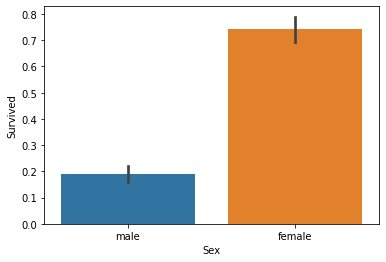

In [25]:
sns.barplot(x = "Sex", y = "Survived", data = X_train)
print("Percentage of females who survived:", X_train["Survived"][X_train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", X_train["Survived"][X_train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

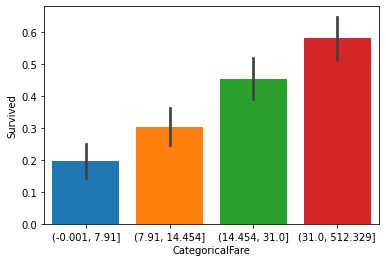

In [26]:
sns.barplot(x = "CategoricalFare", y = "Survived", 
            data = X_train, 
            saturation=1);

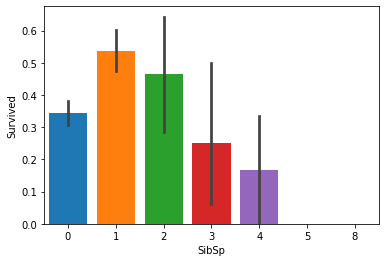

In [27]:
sns.barplot(x = "SibSp", y = "Survived", data = X_train, saturation = 1);

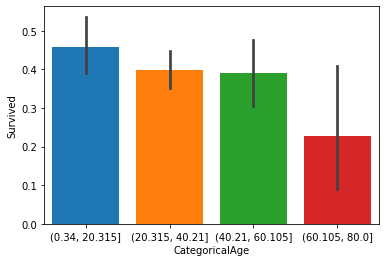

In [28]:
sns.barplot(x = "CategoricalAge", y = "Survived", data = X_train, saturation=1);

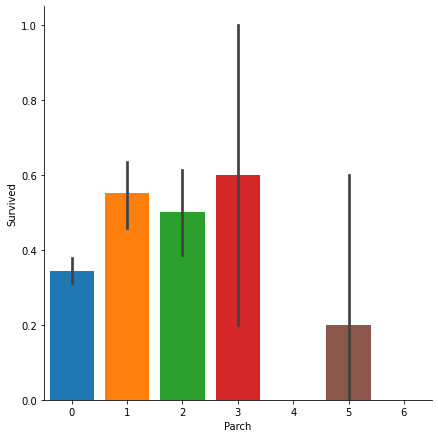

In [29]:
sns.catplot(x = "Parch", y = "Survived", data = X_train, height = 6, saturation = 1, kind = "bar");

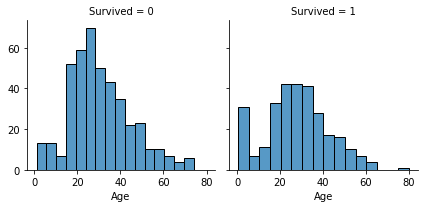

In [30]:
s = sns.FacetGrid(X_train, col = "Survived");
s = s.map(sns.histplot, "Age")

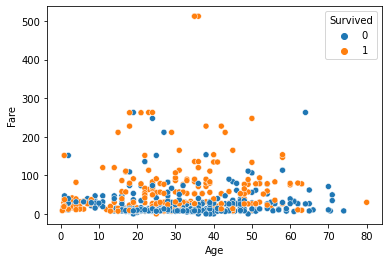

In [31]:
sns.scatterplot(x = "Age", y = "Fare", data = X_train, hue = "Survived");

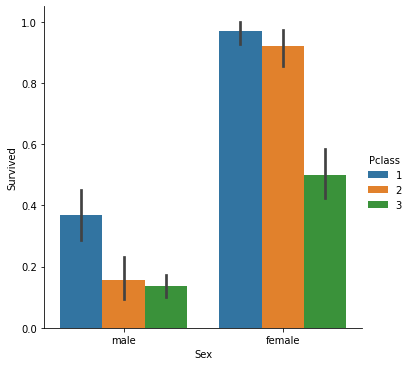

In [32]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=X_train);

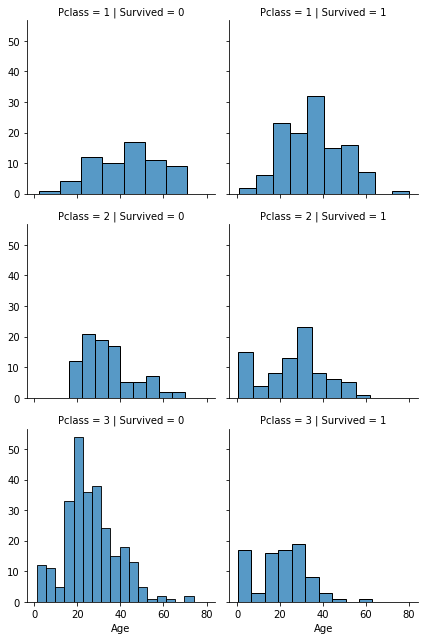

In [33]:
g = sns.FacetGrid(X_train, col = "Survived", row = "Pclass")
g = g.map(sns.histplot,"Age")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


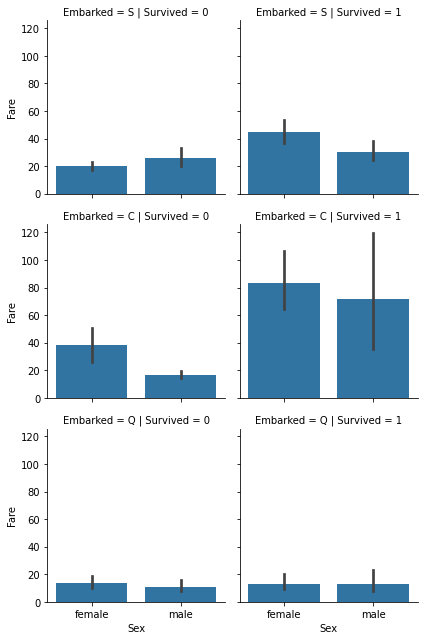

In [34]:
g = sns.FacetGrid(X_train,  row = "Embarked", col = "Survived")
g.map(sns.barplot, "Sex","Fare");

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


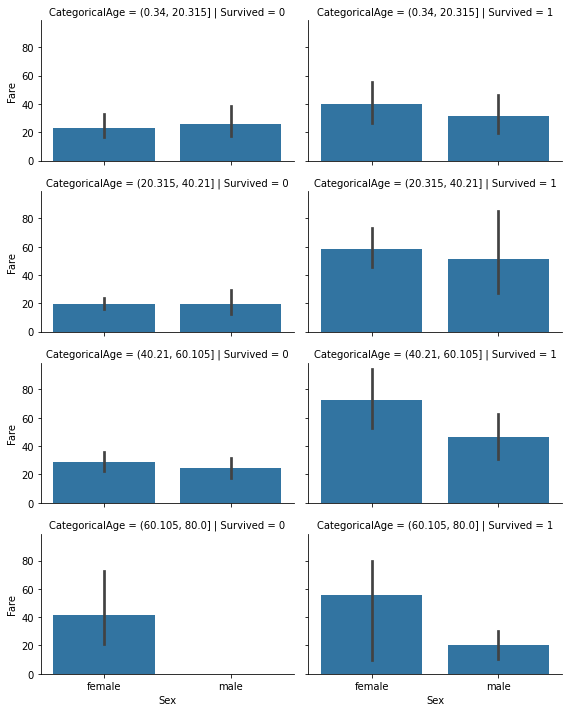

In [35]:
g = sns.FacetGrid(X_train, row = "CategoricalAge", col = "Survived",height=2.5, aspect=1.6)
g.map(sns.barplot, "Sex","Fare");

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


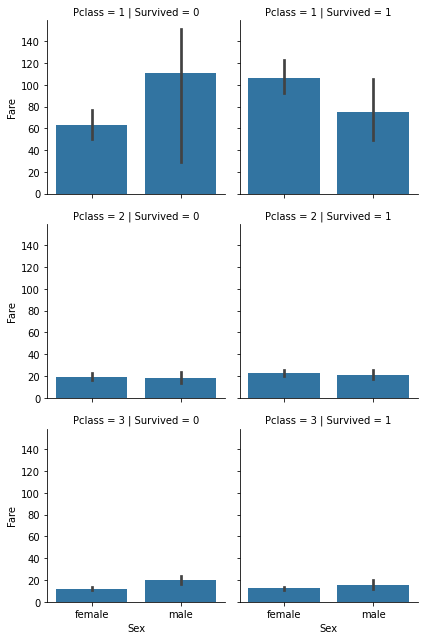

In [36]:
g = sns.FacetGrid(X_train, col = "Survived", row = "Pclass",height = 3)
g = g.map(sns.barplot,"Sex","Fare")

In [37]:
train_test = [X_train,X_test]
for dataset in train_test:
  dataset["Title"] = dataset["Name"].str.extract("([A-Za-z]+)\.",expand = False)

In [38]:
X_train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Jonkheer      1
Ms            1
Countess      1
Sir           1
Lady          1
Capt          1
Don           1
Name: Title, dtype: int64

In [39]:
X_test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [40]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir":3,}
for dataset in train_test:
  dataset["Title"] = dataset["Title"].map(title_mapping)

In [41]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalFare,CategoricalAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(-0.001, 7.91]","(20.315, 40.21]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(31.0, 512.329]","(20.315, 40.21]",2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(7.91, 14.454]","(20.315, 40.21]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(31.0, 512.329]","(20.315, 40.21]",2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(7.91, 14.454]","(20.315, 40.21]",0


In [42]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


0 15.667311411992262
1 69.78021978021978
2 79.2
3 52.23880597014925


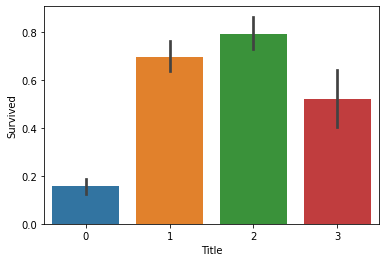

In [43]:
sns.barplot(x = "Title", y = "Survived", data = X_train);
print("0",X_train["Survived"][X_train["Title"] == 0].value_counts(normalize = True)[1]*100)
print("1",X_train["Survived"][X_train["Title"] == 1].value_counts(normalize = True)[1]*100) 
print("2",X_train["Survived"][X_train["Title"] == 2].value_counts(normalize = True)[1]*100) 
print("3",X_train["Survived"][X_train["Title"] == 3].value_counts(normalize = True)[1]*100) 

In [44]:
X_train = X_train.drop(["Name"], axis = 1)
X_test = X_test.drop(["Name"], axis = 1)

In [45]:
X_train = X_train.drop(["CategoricalAge"], axis = 1)
X_train = X_train.drop(["CategoricalFare"], axis = 1)

In [46]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [47]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [48]:
X_train["Age"].isnull().sum()

177

In [49]:
X_test["Age"].isnull().sum()

86

In [50]:
X_train["Age"].fillna(X_train["Age"].median(), inplace = True)
X_test["Age"].fillna(X_train["Age"].median(), inplace = True)

In [51]:
X_train["Age"].isnull().sum()

0

In [52]:
X_test["Age"].isnull().sum()

0

In [53]:
X_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

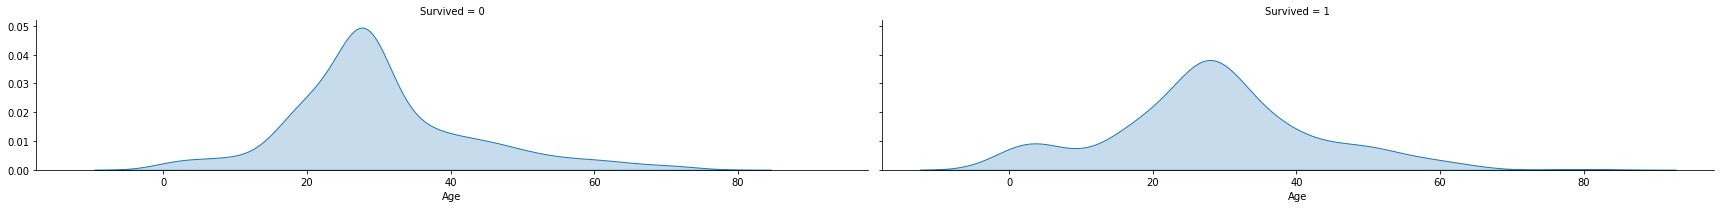

In [54]:
g = sns.FacetGrid(X_train,col = "Survived", aspect=4)
g.map(sns.kdeplot, "Age",shade = True)
plt.show()

In [55]:
train_test = [X_train,X_test]

In [56]:
for dataset in train_test:
  dataset.loc[dataset["Age"] <= 16,"Age"] = 0
  dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 26), "Age"] = 1
  dataset.loc[(dataset["Age"] > 26) & (dataset["Age"] <= 36), "Age"] = 2
  dataset.loc[(dataset["Age"] > 36) & (dataset["Age"] <=62), "Age"] = 3
  dataset.loc[dataset["Age"] > 62, "Age"] = 4

In [57]:
X_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,0.0,1,0,237736,30.0708,NaN,C,2


0 = 55.00000000000001
1 = 34.24657534246575
2 = 37.13527851458886
3 = 38.333333333333336
4 = 20.0


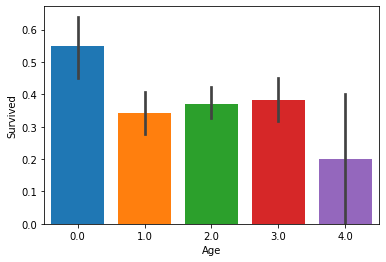

In [58]:
sns.barplot(x = "Age", y = "Survived", 
            data = X_train, 
            saturation=1);
print("0 =",X_train["Survived"][X_train["Age"] == 0].value_counts(normalize = True)[1]*100)
print("1 =",X_train["Survived"][X_train["Age"] == 1].value_counts(normalize = True)[1]*100)
print("2 =",X_train["Survived"][X_train["Age"] == 2].value_counts(normalize = True)[1]*100)
print("3 =",X_train["Survived"][X_train["Age"] == 3].value_counts(normalize = True)[1]*100)
print("4 =",X_train["Survived"][X_train["Age"] == 4].value_counts(normalize = True)[1]*100)

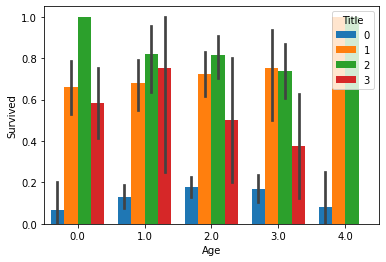

In [59]:
sns.barplot(x = "Age", y = "Survived", 
            data = X_train, 
            saturation=1, hue = "Title");

In [60]:
combine = [X_train,X_test]

In [61]:
for dataset in combine:
  dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [62]:
for dataset in combine:
  print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64
PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64


In [63]:
train_test = [X_train,X_test]

In [64]:
for dataset in train_test:
  dataset.loc[dataset["Fare"] <= 17, "Fare"] = 0
  dataset.loc[(dataset["Fare"] > 17) & (dataset["Fare"] <= 30), "Fare"] = 1
  dataset.loc[(dataset["Fare"] >30) & (dataset["Fare"] <= 100), "Fare"] = 2
  dataset.loc[dataset["Fare"] > 100, "Fare"] = 3

In [65]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,female,3.0,1,0,PC 17599,2.0,C85,C,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,2.0,C123,S,2
4,5,0,3,male,2.0,0,0,373450,0.0,NaN,S,0


In [66]:
for dataset in train_test:
  dataset["Cabin"] = dataset["Cabin"].str[:1]

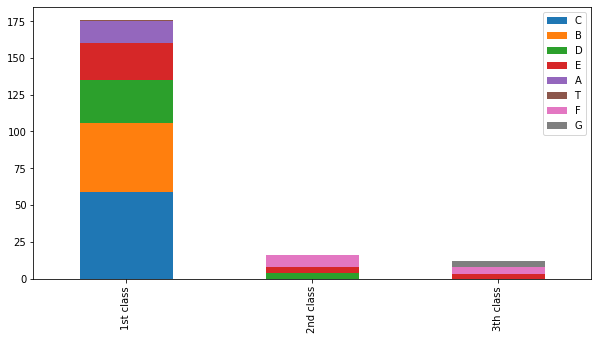

In [67]:
Pc11 = X_train[X_train["Pclass"] == 1]["Cabin"].value_counts()
Pcl2 = X_train[X_train["Pclass"] == 2]["Cabin"].value_counts()
Pcl3 = X_train[X_train["Pclass"] == 3]["Cabin"].value_counts()
df = pd.DataFrame([Pc11,Pcl2,Pcl3])
df.index = ["1st class","2nd class","3th class"]
df.plot(kind = "bar", stacked = True, figsize = (10,5));

In [68]:
cabin_mapping1 = {"A": 0,"B": 0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}
for dataset in train_test:
  dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping1)

In [69]:
X_train["Cabin"].fillna(X_train.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
X_test["Cabin"].fillna(X_test.groupby("Pclass")["Cabin"].transform("median"), inplace = True)

In [70]:
for dataset in combine:
  print(dataset.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


In [71]:
X_train["FamilySize"] = X_train["SibSp"] + X_train["Parch"] + 1
X_test["FamilySize"] = X_test["SibSp"] + X_test["Parch"] + 1

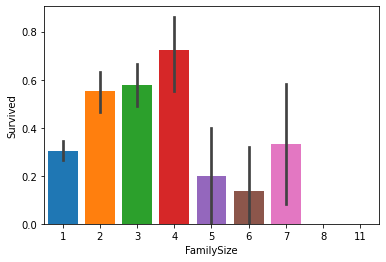

In [72]:
sns.barplot(x = "FamilySize", y = "Survived", 
            data = X_train, 
            saturation=1);

In [73]:
sex_mapping = {
    "male": 0,
    "female": 1
}
for dataset in train_test:
  dataset["Sex"] = dataset["Sex"].map(sex_mapping)

In [74]:
embarked_mapping = {
    "S": 0,
    "C": 1,
    "Q": 2
}
for dataset in train_test:
  dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)

In [75]:
FeaturesDrop = ["Ticket","SibSp","Parch"]
X_train = X_train.drop(FeaturesDrop, axis = 1)
X_test = X_test.drop(FeaturesDrop, axis = 1)

In [76]:
X_train.head(n = 891)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,2
1,2,1,1,1,3.0,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0.0,2.0,0,1,1
3,4,1,1,1,2.0,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0.0,2.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,2.0,0.0,1.8,0,3,1
887,888,1,1,1,1.0,1.0,0.4,0,1,1
888,889,0,3,1,2.0,1.0,2.0,0,1,4
889,890,1,1,0,1.0,1.0,0.8,1,0,1


In [77]:
X_train.shape, X_test.shape

((891, 10), (418, 9))

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [80]:
train_x = X_train.drop("Survived", axis=1)
train_y = X_train["Survived"]
train_x.shape, train_y.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [81]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.48888889 0.64044944 0.53932584 0.58426966 0.60674157 0.57303371
 0.47191011 0.5505618  0.56179775 0.48314607]


In [82]:
round(np.mean(score)* 100,2)

55.0

In [83]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73333333 0.79775281 0.71910112 0.76404494 0.73033708 0.79775281
 0.74157303 0.70786517 0.70786517 0.76404494]


In [84]:
round(np.mean(score) * 100,2)

74.64

In [85]:
clf = RandomForestClassifier(n_estimators=200)
scoring = 'accuracy'
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.84269663 0.79775281 0.80898876 0.7752809  0.80898876
 0.80898876 0.70786517 0.78651685 0.84269663]


In [86]:
round(np.mean(score)*100,2)

79.91

In [87]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.74157303 0.76404494 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.82022472]


In [88]:
round(np.mean(score)*100,2)

78.67

In [89]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.56666667 0.66292135 0.65168539 0.59550562 0.69662921 0.65168539
 0.59550562 0.65168539 0.56179775 0.52808989]


In [90]:
round(np.mean(score)*100,2)

61.62

In [91]:
clf = LogisticRegression()
scoring = "accuracy"
score = cross_val_score(clf, train_x, train_y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.81111111 0.75280899 0.78651685 0.78651685 0.80898876 0.83146067
 0.82022472 0.82022472 0.82022472 0.85393258]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [92]:
round(np.mean(score)*100,2)

80.92

In [93]:
clf = LogisticRegression()
clf.fit(train_x, train_y)

test_data = X_test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [94]:
submission = pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Survived": prediction
    })

#submission.to_csv('submission.csv', index=False)